<a href="https://www.kaggle.com/code/shivankv098/zomato-stock-price-prediction?scriptVersionId=164491328" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-stock-price-prediction/zomato.csv


In [2]:
df = pd.read_csv('/kaggle/input/zomato-stock-price-prediction/zomato.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089
...,...,...,...,...,...,...,...
626,2024-02-01,141.000000,143.500000,138.550003,140.550003,140.550003,70252449
627,2024-02-02,141.800003,145.000000,141.449997,143.800003,143.800003,78666454
628,2024-02-05,145.000000,145.399994,138.250000,140.250000,140.250000,54189688
629,2024-02-06,140.399994,141.800003,138.050003,139.949997,139.949997,46782951


# **About Dataset:**

This dataset presents historical stock price information for Zomato, a leading online food delivery and restaurant aggregator company. The dataset is compiled with data collected over a specific time period, showcasing the fluctuation in Zomato's stock prices over days, weeks, or months, depending on the granularity of the dataset.  

Key Features:  

* Date: The date of the recorded stock price.
* Open Price: The opening price of Zomato's stock on the given date.
* Close Price: The closing price of Zomato's stock on the given date.
* High Price: The highest price of Zomato's stock reached during the trading day.
* Low Price: The lowest price of Zomato's stock reached during the trading day.
* Volume: The total volume of Zomato's stock traded on the given date.

# **EDA**

In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,631.000000,631.000000,631.000000,631.000000,631.000000,6.310000e+02
mean,90.011252,91.835737,87.868304,89.707686,89.707686,6.731737e+07
std,32.757639,33.319545,31.900849,32.621900,32.621900,7.461030e+07
min,40.849998,44.400002,40.599998,41.650002,41.650002,0.000000e+00
25%,62.549999,63.450001,61.125000,62.074998,62.074998,2.800788e+07
50%,80.000000,81.000000,78.099998,79.699997,79.699997,4.759710e+07
75%,124.474998,126.750000,121.525002,124.599998,124.599998,7.525439e+07
max,161.149994,169.000000,154.250000,160.300003,160.300003,6.948953e+08


**The above chart gives us a descriptive analytics of stock prizes.**  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       631 non-null    object 
 1   Open       631 non-null    float64
 2   High       631 non-null    float64
 3   Low        631 non-null    float64
 4   Close      631 non-null    float64
 5   Adj Close  631 non-null    float64
 6   Volume     631 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 34.6+ KB


**As we can see the date column is object type so converting it into datetime format in next cell.**

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       631 non-null    datetime64[ns]
 1   Open       631 non-null    float64       
 2   High       631 non-null    float64       
 3   Low        631 non-null    float64       
 4   Close      631 non-null    float64       
 5   Adj Close  631 non-null    float64       
 6   Volume     631 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 34.6 KB


**Successfully converted.**

### **Checking for the missing value in the dataset**

In [6]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**There are no missing values, which is a good news.**

### **Checking the distribution of each column**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


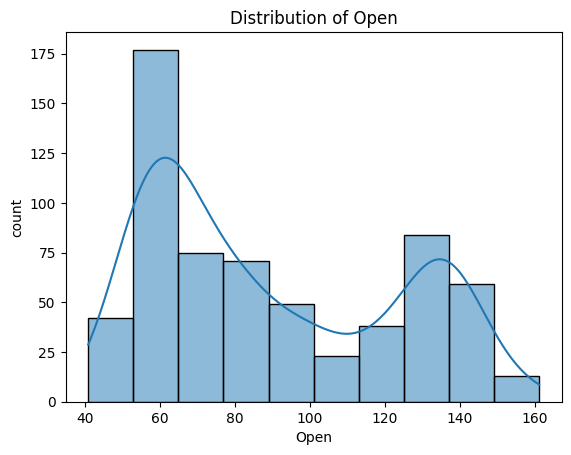

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


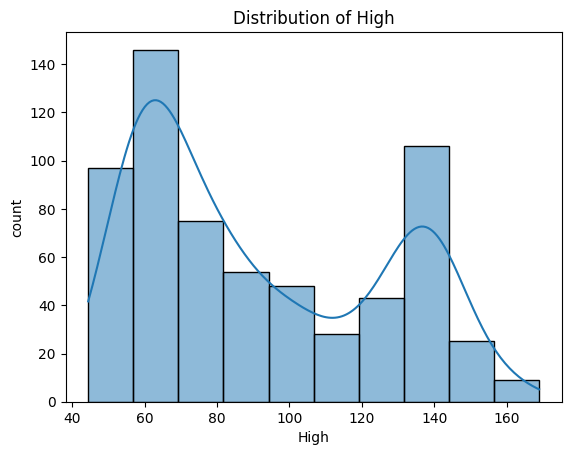

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


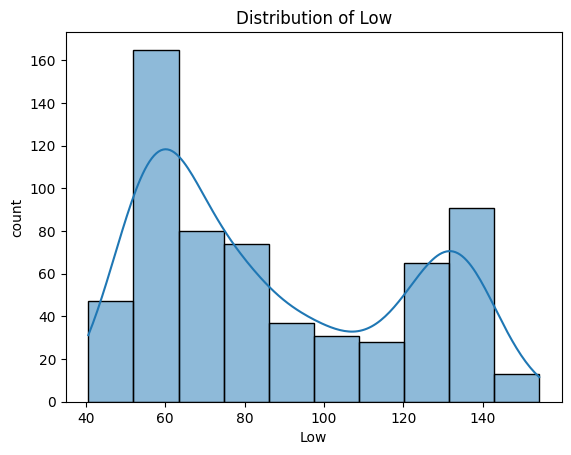

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


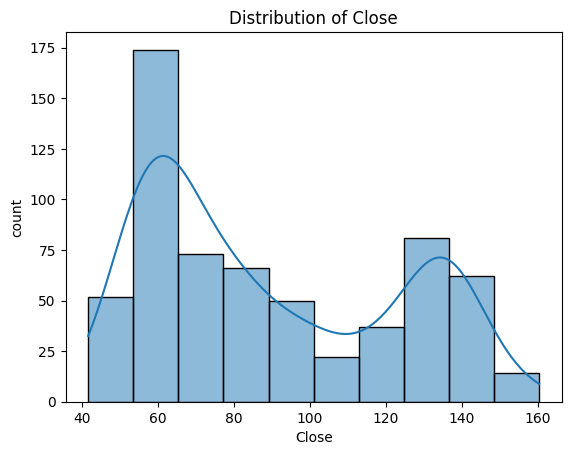

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


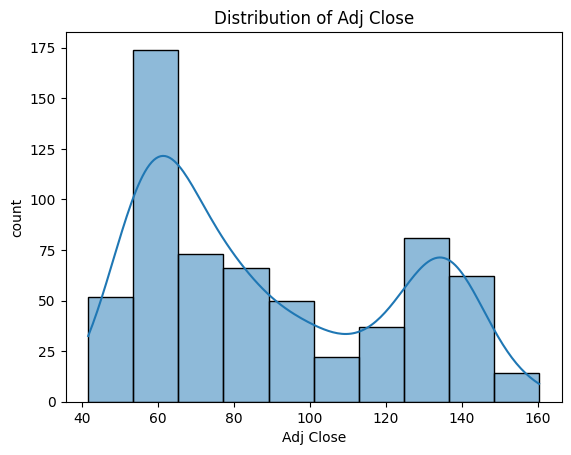

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


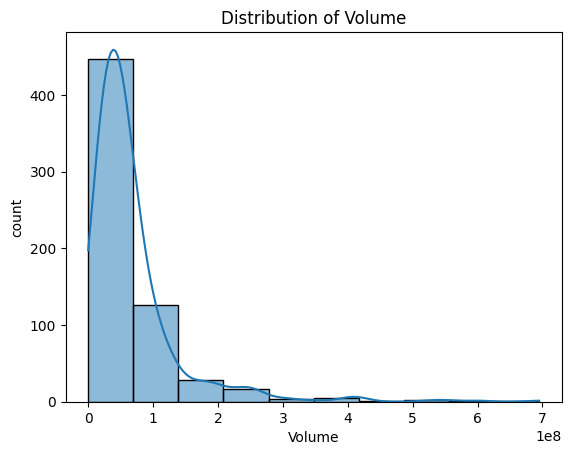

In [7]:
num_cols = df.select_dtypes(include=['int', 'float']).columns
for col in num_cols:
    if df[col].dtype == 'int' or df[col].dtype == 'float':
        sns.histplot(data=df, x=df[col], kde=True, bins=10)
        plt.ylabel('count')
        plt.title(f'Distribution of {col}')
        plt.show()

### **Checking the Boxplot to find if there are any outliers or not**

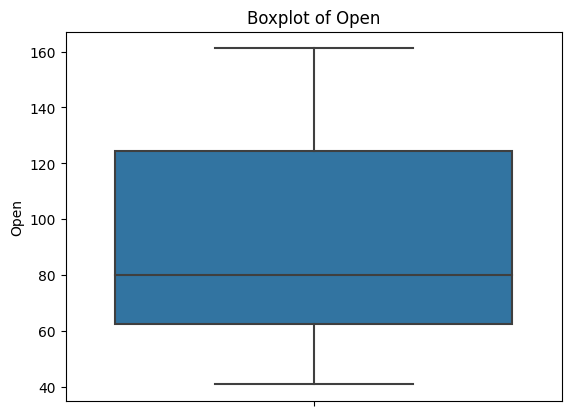

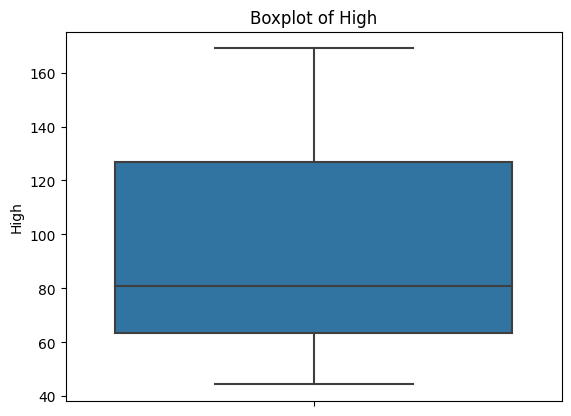

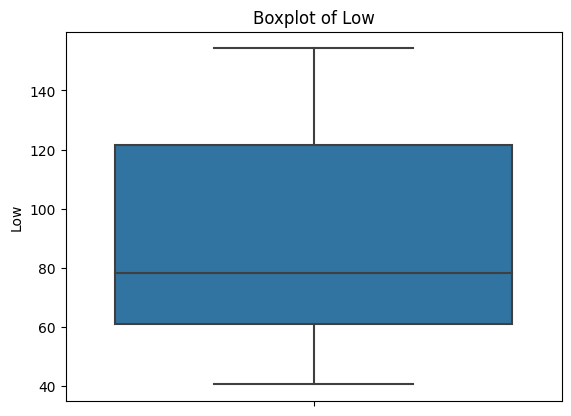

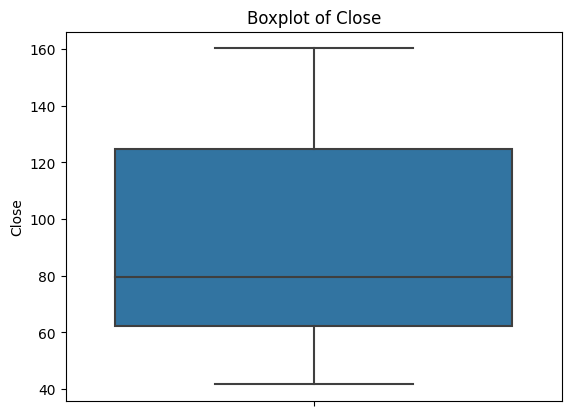

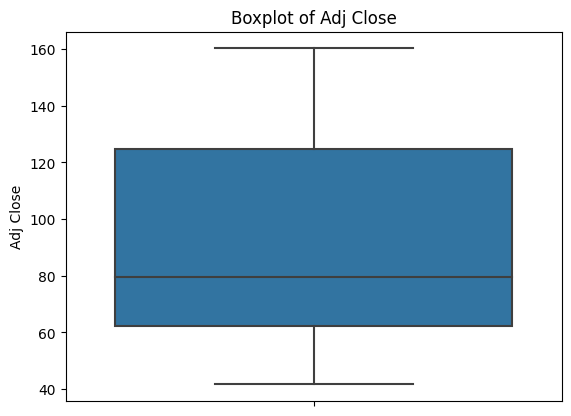

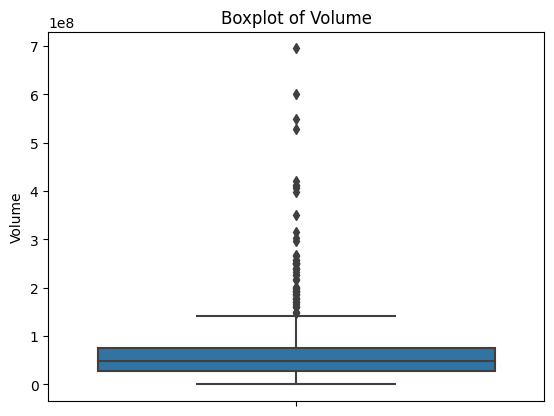

In [8]:
for col in num_cols:
    sns.boxplot(data=df, y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

**Only Volume column contains outliers, but we are not removing the outliers because it requires a domain expert to decide that.**

# **Visualization of Prices & Volume over Time**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

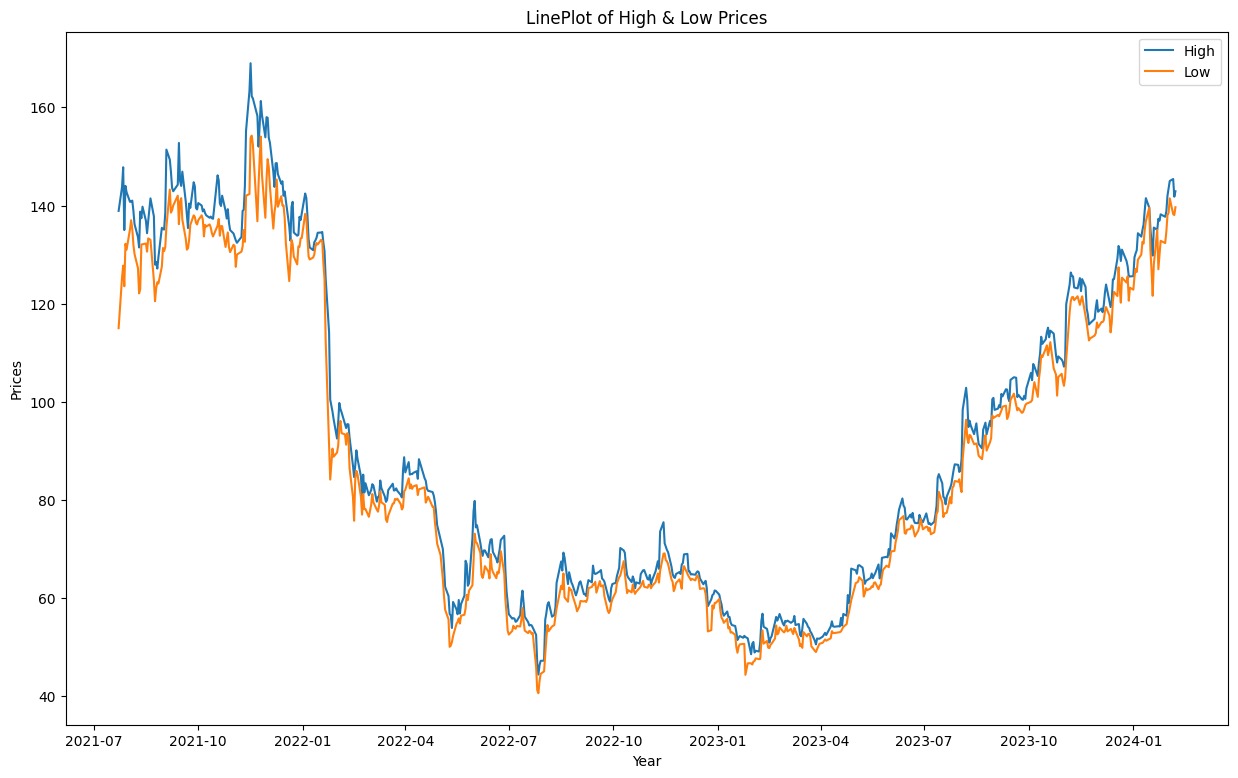

In [9]:
plt.figure(figsize=(15,9))
sns.lineplot(data=df, x='Date', y='High', label='High')
sns.lineplot(data=df, x='Date', y='Low', label='Low')
plt.legend()
plt.title('LinePlot of High & Low Prices')
plt.ylabel('Prices')
plt.xlabel('Year')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

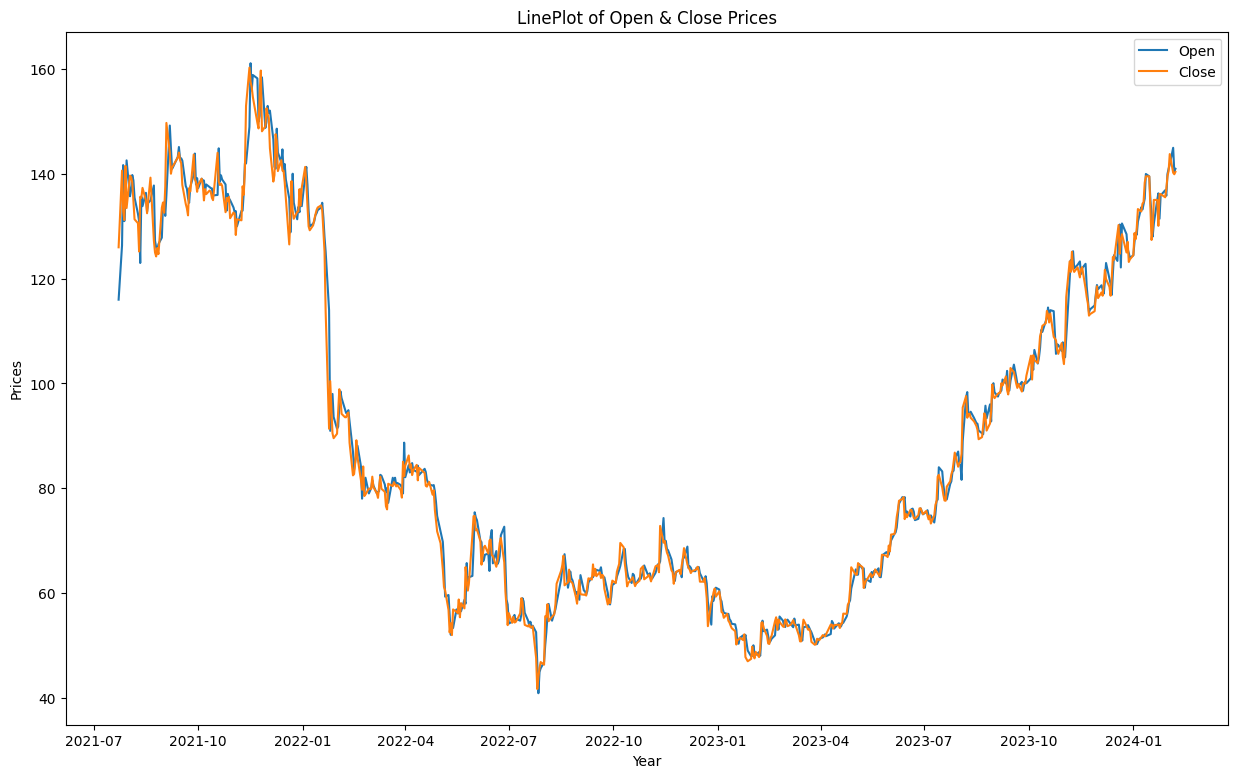

In [10]:
plt.figure(figsize=(15,9))
sns.lineplot(data=df, x='Date', y='Open', label='Open')
sns.lineplot(data=df, x='Date', y='Close', label='Close')
plt.legend()
plt.title('LinePlot of Open & Close Prices')
plt.ylabel('Prices')
plt.xlabel('Year')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


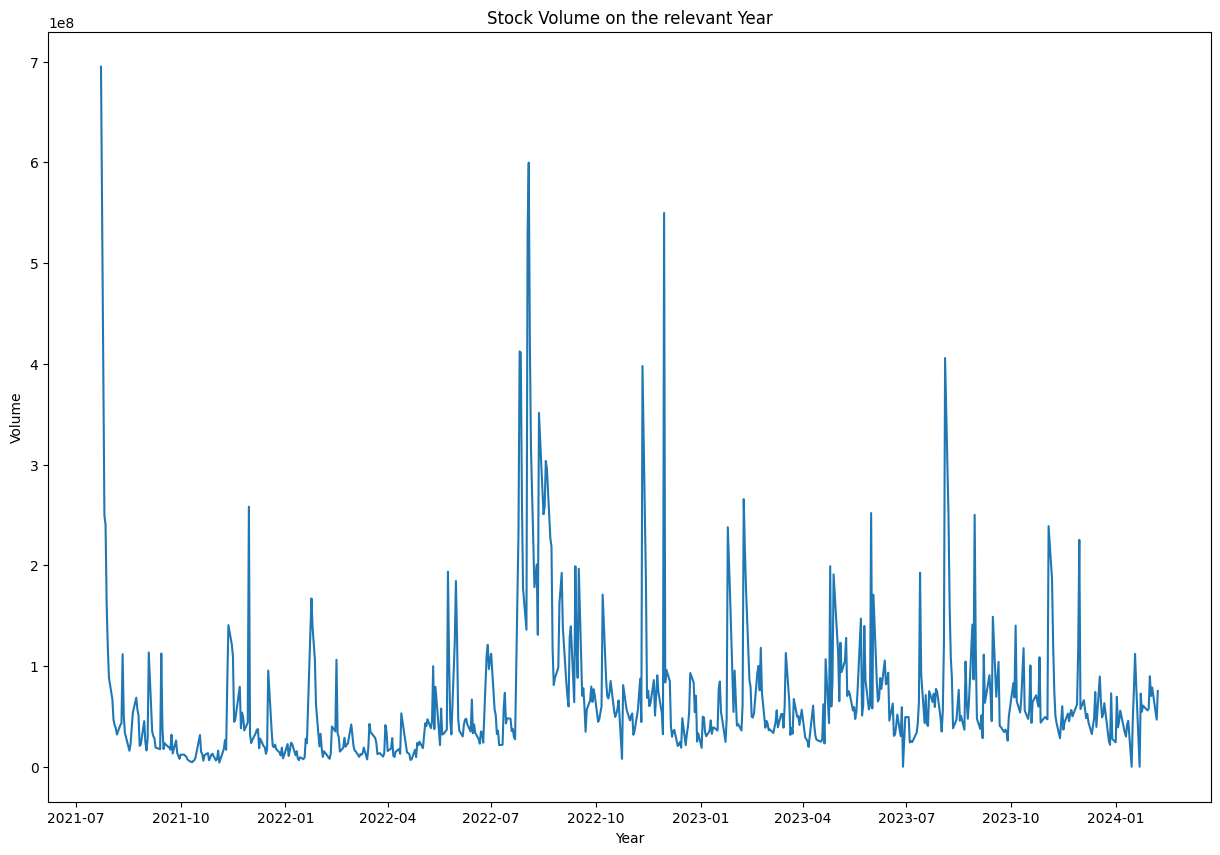

In [11]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df, x='Date', y='Volume')
plt.title('Stock Volume on the relevant Year')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.show()

# **Time Series Analysis on Opening Stock Price using FB-Prophet**

In [12]:
df_open = df[['Date','Open']]
df_open

,Date,Open
0,2021-07-23,116.000000
1,2021-07-26,126.349998
2,2021-07-27,141.699997
3,2021-07-28,131.000000
4,2021-07-29,134.949997
...,...,...
626,2024-02-01,141.000000
627,2024-02-02,141.800003
628,2024-02-05,145.000000
629,2024-02-06,140.399994


Renaming the Date columns to ds & Open column to y

In [13]:
df_open.rename(columns={'Date':'ds','Open':'y'},inplace=True)
df_open

/tmp/ipykernel_18/1185244258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_open.rename(columns={'Date':'ds','Open':'y'},inplace=True)


,ds,y
0,2021-07-23,116.000000
1,2021-07-26,126.349998
2,2021-07-27,141.699997
3,2021-07-28,131.000000
4,2021-07-29,134.949997
...,...,...
626,2024-02-01,141.000000
627,2024-02-02,141.800003
628,2024-02-05,145.000000
629,2024-02-06,140.399994


In [14]:
model_open = Prophet()
model_open.fit(df_open)

06:22:34 - cmdstanpy - INFO - Chain [1] start processing
06:22:34 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
future_open = model_open.make_future_dataframe(periods=365)
future_open.tail()

,ds
991,2025-02-02
992,2025-02-03
993,2025-02-04
994,2025-02-05
995,2025-02-06


In [16]:
forecast_open = model_open.predict(future_open)
forecast_open[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
991,2025-02-02,183.998723,147.330185,224.721379
992,2025-02-03,197.074206,158.672589,237.242319
993,2025-02-04,196.220746,157.195141,236.758228
994,2025-02-05,195.768100,155.677999,235.457123
995,2025-02-06,195.526834,157.329636,234.704330


In [17]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model_open, forecast_open)

In [18]:
plot_components_plotly(model_open, forecast_open)

/opt/conda/lib/python3.10/site-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



# **Time Series Analysis on Closing Stock Price using FB-Prophet**

In [19]:
df_close = df[['Date','Close']]
df_close

,Date,Close
0,2021-07-23,126.000000
1,2021-07-26,140.649994
2,2021-07-27,132.899994
3,2021-07-28,131.199997
4,2021-07-29,141.550003
...,...,...
626,2024-02-01,140.550003
627,2024-02-02,143.800003
628,2024-02-05,140.250000
629,2024-02-06,139.949997


In [20]:
df_close.rename(columns={'Date':'ds','Close':'y'},inplace=True)
df_close

/tmp/ipykernel_18/2209883113.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2021-07-23,126.000000
1,2021-07-26,140.649994
2,2021-07-27,132.899994
3,2021-07-28,131.199997
4,2021-07-29,141.550003
...,...,...
626,2024-02-01,140.550003
627,2024-02-02,143.800003
628,2024-02-05,140.250000
629,2024-02-06,139.949997


In [21]:
model_close = Prophet()
model_close.fit(df_close)

06:22:37 - cmdstanpy - INFO - Chain [1] start processing
06:22:37 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
future_close = model_close.make_future_dataframe(periods=365)
future_close.tail()

,ds
991,2025-02-02
992,2025-02-03
993,2025-02-04
994,2025-02-05
995,2025-02-06


In [23]:
forecast_close = model_close.predict(future_close)
forecast_close[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
991,2025-02-02,188.714823,147.467758,226.907681
992,2025-02-03,196.192216,153.922992,233.958989
993,2025-02-04,195.673086,154.897408,234.891158
994,2025-02-05,195.592108,154.424673,236.915067
995,2025-02-06,195.390346,154.152736,234.624396


In [24]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model_close, forecast_close)

In [25]:
plot_components_plotly(model_close, forecast_close)

/opt/conda/lib/python3.10/site-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



# **Time Series Analysis on Stock Volume using FB-Prophet¶**

In [26]:
df_volume = df[['Date','Volume']]
df_volume

,Date,Volume
0,2021-07-23,694895290
1,2021-07-26,249723854
2,2021-07-27,240341900
3,2021-07-28,159793731
4,2021-07-29,117973089
...,...,...
626,2024-02-01,70252449
627,2024-02-02,78666454
628,2024-02-05,54189688
629,2024-02-06,46782951


In [27]:
df_volume.rename(columns={'Date':'ds','Volume':'y'},inplace=True)
df_volume

/tmp/ipykernel_18/1710543927.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2021-07-23,694895290
1,2021-07-26,249723854
2,2021-07-27,240341900
3,2021-07-28,159793731
4,2021-07-29,117973089
...,...,...
626,2024-02-01,70252449
627,2024-02-02,78666454
628,2024-02-05,54189688
629,2024-02-06,46782951


In [28]:
model_volume = Prophet()
model_volume.fit(df_volume)

06:22:39 - cmdstanpy - INFO - Chain [1] start processing
06:22:39 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
future_volume = model_volume.make_future_dataframe(periods=365)
future_volume.tail()

,ds
991,2025-02-02
992,2025-02-03
993,2025-02-04
994,2025-02-05
995,2025-02-06


In [30]:
forecast_volume = model_volume.predict(future_volume)
forecast_volume[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
991,2025-02-02,4.475324e+08,3.717012e+08,5.290899e+08
992,2025-02-03,3.819030e+07,-4.050176e+07,1.194509e+08
993,2025-02-04,5.032909e+07,-3.195478e+07,1.255402e+08
994,2025-02-05,4.948767e+07,-2.883656e+07,1.308235e+08
995,2025-02-06,3.908321e+07,-4.263808e+07,1.259235e+08


In [31]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model_volume, forecast_volume)


In [32]:
plot_components_plotly(model_volume, forecast_volume)

/opt/conda/lib/python3.10/site-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



# **Thank You**